In [105]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [106]:
# <-- IMPORTAÇÃO DOS DADOS
dados = pd.read_csv(r'C:\Cursos\Formacao_Data_Science\31.Prática em Python\dados\iris.csv')

In [107]:
# <-- SEPARAÇÃO DOS DADOS
previsores = dados.iloc[:, 0:4].values
classe = dados.iloc[:, 4].values

In [108]:
# <-- TRANSFORMAÇÃO DOS DADOS CATEGÓRICOS EM NUMÉRICOS
labelencoder = LabelEncoder()
classe = labelencoder.fit_transform(classe)

In [109]:
# <-- CONTAGEM DE ÚNICOS E REGISTROS POR CLASSE
unicos, quantidade = np.unique(classe, return_counts = True)
unicos, quantidade

(array([0, 1, 2]), array([50, 50, 50], dtype=int64))

In [110]:
# <-- CRIAÇÃO E TREINAMENTO DO MODELO
cluster = KMeans(n_clusters= len(unicos))
cluster.fit(previsores)

KMeans(n_clusters=3)

In [111]:
# <-- VISUALIZAÇÃO DOS CENTROIDES
centroides = cluster.cluster_centers_
centroides

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [112]:
# <-- VISUALIZAÇÃO DOS GRUPOS FORMADOS
previsoes = cluster.labels_
previsoes

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [113]:
# CONTAGEM DOS REGISTROS PELA PREVISÃO
unicos2, quantidade2 = np.unique(previsoes, return_counts = True)
unicos2, quantidade2

(array([0, 1, 2]), array([38, 50, 62], dtype=int64))

In [114]:
# MATRIX DE CONFUSÃO PARA COMPARAÇÃO DOS DADOS
resultados = confusion_matrix(classe, previsoes)
resultados

array([[ 0, 50,  0],
       [ 2,  0, 48],
       [36,  0, 14]], dtype=int64)

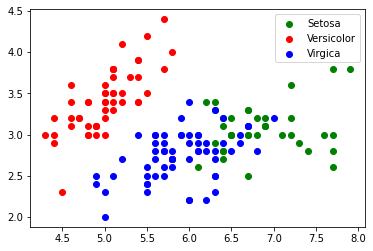

In [115]:
# Geração do gráfico com os clusters gerados, considerando para um (previsoes 0, 1 ou 2)
# Usamos somente as colunas 0 e 1 da base de dados original para termos 2 dimensões
plt.scatter(previsores[previsoes == 0, 0], previsores[previsoes == 0, 1], 
            c = 'green', label = 'Setosa')
plt.scatter(previsores[previsoes == 1, 0], previsores[previsoes == 1, 1], 
            c = 'red', label = 'Versicolor')
plt.scatter(previsores[previsoes == 2, 0], previsores[previsoes == 2, 1], 
            c = 'blue', label = 'Virgica')
plt.legend()